<a href="https://colab.research.google.com/github/Djvnit/Titanic_Using_Logistic_Regression/blob/main/Titanic_using_LOGISTIC_REGRESSION(BEST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting google drive to get dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading of training Data/ Collecting Data

In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv(r"/content/drive/MyDrive/Python Tasks/Titanic Data/train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print("Total no. of passangers were:",len(train))

Total no. of passangers were: 891


# Analysing Data

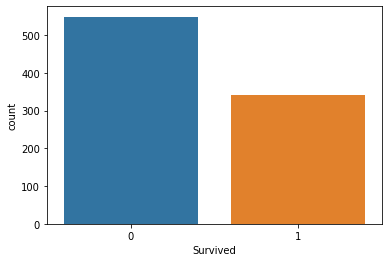

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
sns.countplot(x = "Survived",data = train)


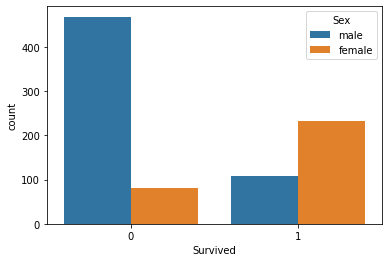

In [ ]:
sns.countplot(x = "Survived",hue = "Sex",data = train)

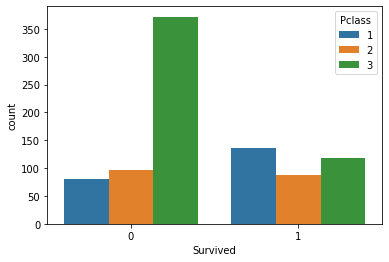

In [ ]:
sns.countplot(x = "Survived",hue = "Pclass",data = train)

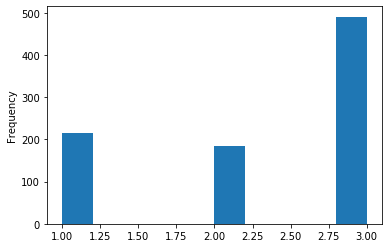

In [ ]:
train["Pclass"].plot.hist()

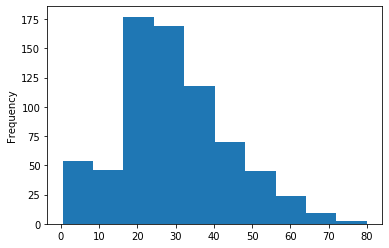

In [ ]:
train["Age"].plot.hist()

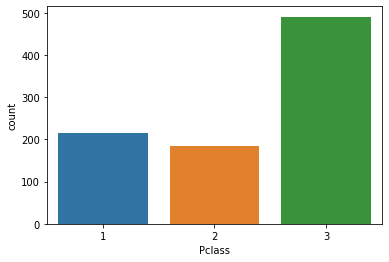

In [ ]:
sns.countplot(x = "Pclass",data = train)

# It is difficult to see the major age group people in titanic.So,We can either visualize it using histogram plot or use statical mean of numpy

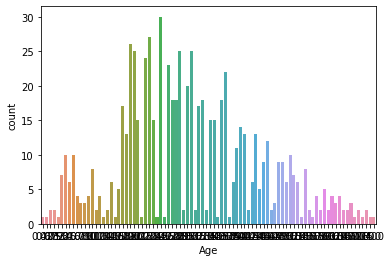

In [ ]:
sns.countplot(x = "Age",data = train)

In [ ]:
train["Age"].mean()

29.69911764705882

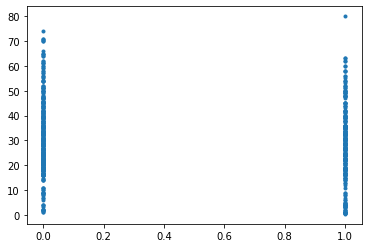

In [ ]:
plt.scatter(train["Survived"],train["Age"],marker = ".")
plt.show()

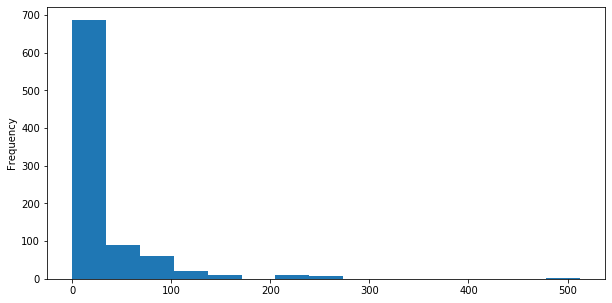

In [ ]:
train["Fare"].plot.hist(bins = 15,figsize = (10,5))


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Data Wrangling

In [ ]:
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Age"].isnull().any()

False

In [ ]:
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])
train["Embarked"].isnull().any()

False

In [ ]:
coltod = ['Name','PassengerId','Ticket','Cabin']
train.drop(coltod,axis=1,inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


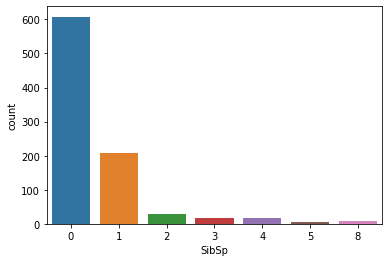

In [ ]:
sns.countplot("SibSp",data = train)

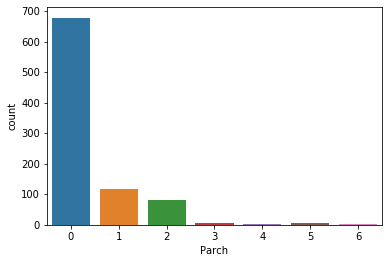

In [ ]:
sns.countplot("Parch",data = train)

#Conclusion :- Class 3 passanger are youngest ones and the class 1 passangers are mostly old.

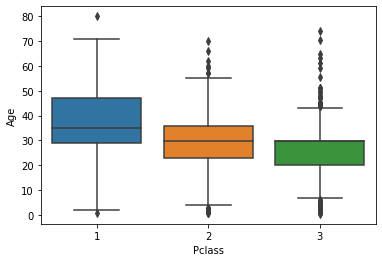

In [ ]:
sns.boxplot(x = "Pclass",y = "Age",data = train)


# Converting non-integer,float columns into some dummy values as categorical variable..

In [ ]:
sex = pd.get_dummies(train["Sex"],drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embarked = pd.get_dummies(train["Embarked"],drop_first = True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
pclass = pd.get_dummies(train["Pclass"],drop_first = True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
train = pd.concat([train,sex,embarked,pclass],axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,1


In [ ]:
train.drop(["Embarked","Pclass","Sex"],axis = 1,inplace = True)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
male        891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
2           891 non-null uint8
3           891 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.2 KB


In [ ]:
y = train[["Survived"]]
col = list(train.columns)
col.remove("Survived")
print(col)

x = train[col]

['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3]


In [ ]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
x.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg = reg.fit(x_train,y_train)

C:\Users\Deepak Kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepak Kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[116,  12],
       [ 31,  64]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
percentage = accuracy_score(y_test,y_pred)*100

In [ ]:
print("The percentage accuracy of the model is:",percentage)

The percentage accuracy of the model is: 80.71748878923766


In [ ]:
test = pd.read_csv(r"/content/drive/MyDrive/Python Tasks/Titanic Data/test.csv")
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])
test["Embarked"].isnull().any()

False

In [ ]:
sex = pd.get_dummies(test["Sex"],drop_first = True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [ ]:
embarked = pd.get_dummies(test["Embarked"],drop_first = True)
embarked.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
pclass = pd.get_dummies(test["Pclass"],drop_first = True)
pclass.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [ ]:
test = pd.concat([test,sex,embarked,pclass],axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1


In [ ]:
test.drop(["Name","Embarked","Pclass","Sex","Ticket","PassengerId","Cabin"],axis = 1,inplace = True)
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [ ]:
test["Age"] = test["Age"].fillna(test["Age"].mean())
test["Age"].isnull().any()
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())
test["Fare"].isnull().any()

False

In [ ]:
test.isnull().any()

Age      False
SibSp    False
Parch    False
Fare     False
male     False
Q        False
S        False
2        False
3        False
dtype: bool

In [ ]:
test_pred = reg.predict(test)

In [ ]:
print(test_pred)
len(test_pred)
test_pred = list(test_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
actual = pd.read_csv(r"gender_submission.csv")
actual.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
len(actual)

418

In [ ]:
result = list(actual["Survived"])

In [ ]:
df = pd.DataFrame({"Actual_Result":result,"Predicted":test_pred})

In [ ]:
df.head(10)

,Actual_Result,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [ ]:
df1 = df.head(30)

[]

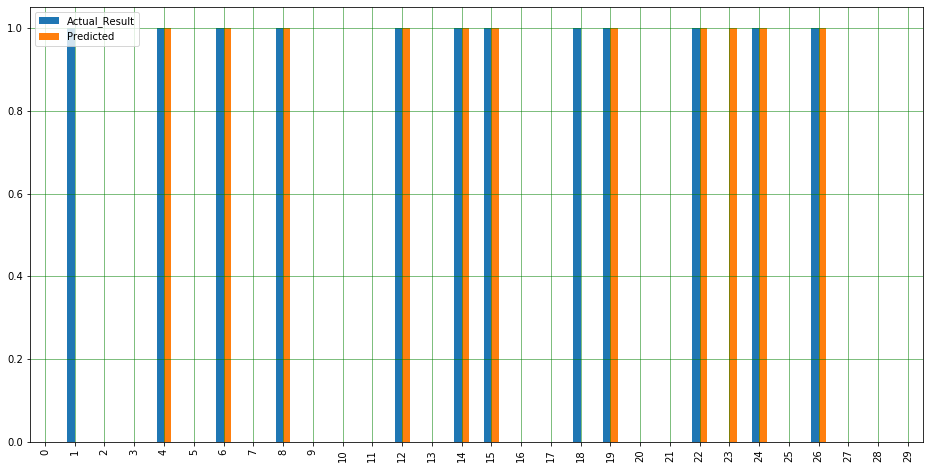

In [ ]:
df1.plot(kind = "bar",figsize = (16,8))
plt.grid(which = "major",linestyle = "-",linewidth = "0.5",color = "g")
plt.grid(which = "minor",linestyle = ":",linewidth = "0.5",color = "k")
plt.plot()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
per_accuracy = accuracy_score(df["Actual_Result"],df["Predicted"])

In [ ]:
print(per_accuracy*100)

95.69377990430623
